In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

<ipython-input-14-a0030765309d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


* Get the stock data from Yahoo finance as a CSV for any company. 
* Drop all other columns (Volume, Year, Month and Day) and retain Open, High and Close - since I'm just predicting the close value for a day

In [15]:
def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [16]:
df = get_stock_data(0)
df.head()

<ipython-input-15-35126cabdc61>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [17]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


<h2>Normalizing and removing the null data points</h2>

In [18]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open     High    Close    Volume
0     0.413  0.41685  0.40525  0.292964
1     0.397  0.40800  0.39565  0.286023
2     0.400  0.40600  0.36120  0.261119
3     0.350  0.44400  0.40880  0.295530
4     0.404  0.40400  0.37910  0.274059
...     ...      ...      ...       ...
2462  2.180  2.21000  2.18550  2.185500
2463  2.215  2.21500  2.12150  2.121500
2464  2.132  2.14450  1.89400  1.894000
2465  1.914  1.98850  1.89500  1.895000
2466  1.890  1.90900  1.87000  1.870000

[2467 rows x 4 columns]


In [19]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [20]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


<h2>Compiling and training the neural network model</h2>

In [21]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
15/15 [==============================] - 1s 15ms/step - loss: 0.1834 - val_loss: 0.8216
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1697 - val_loss: 0.7859
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1542 - val_loss: 0.7401
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1360 - val_loss: 0.6774
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1135 - val_loss: 0.5929
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0872 - val_loss: 0.4856
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0586 - val_loss: 0.3638
Epoch 8/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0328 - val_loss: 0.2441
Epoch 9/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0150 - val_loss: 0.1515
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.1001


<h2>Predicted Values</h2>

In [22]:
predictions = classifier.predict(X_test)
print(predictions[:10])

16/16 [==============================] - 0s 3ms/step
[[0.72942644]
 [0.72695595]
 [0.7230211 ]
 [0.7268784 ]
 [0.72267425]
 [0.71996045]
 [0.7123224 ]
 [0.71316814]
 [0.71384597]
 [0.7347026 ]]


Execute the trained model

<h2>Calculating the error in the trained Neural Network model</h2>

In [23]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.11 RMSE)
Test Score: 1.40 MSE (1.18 RMSE)


<h2>Predictions vs Real results</h2>

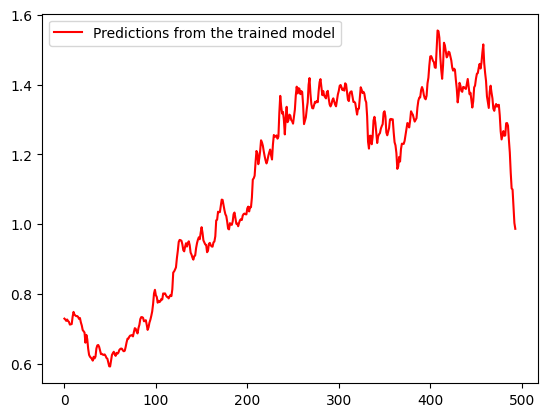

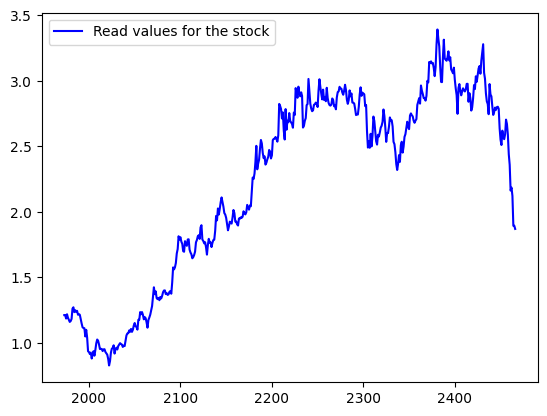

In [24]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()


Since this is a regression problem and not a classification problem, there won't be an accuracy curve.